It's good practise to collect all import statements at the beginning. Since sklearn is such a large library, we only import what we'll need.

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix

In [110]:
df = pd.read_csv("penguins.csv")

## Data Wrangling and Cleaning

There is not much to do here: in this case we're just removing the rows with missing values (10 of 244 = 4% is acceptable)

In [111]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [118]:
df.shape

(344, 7)

In [122]:
df = df.dropna()
df.shape

(334, 7)

## Data Exploration

Usually this is quite extensive. 

We really dive deep into the data: look at summary statistics, correlations and plots to really understand: 

what features are the most important ones for our model?

In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,2


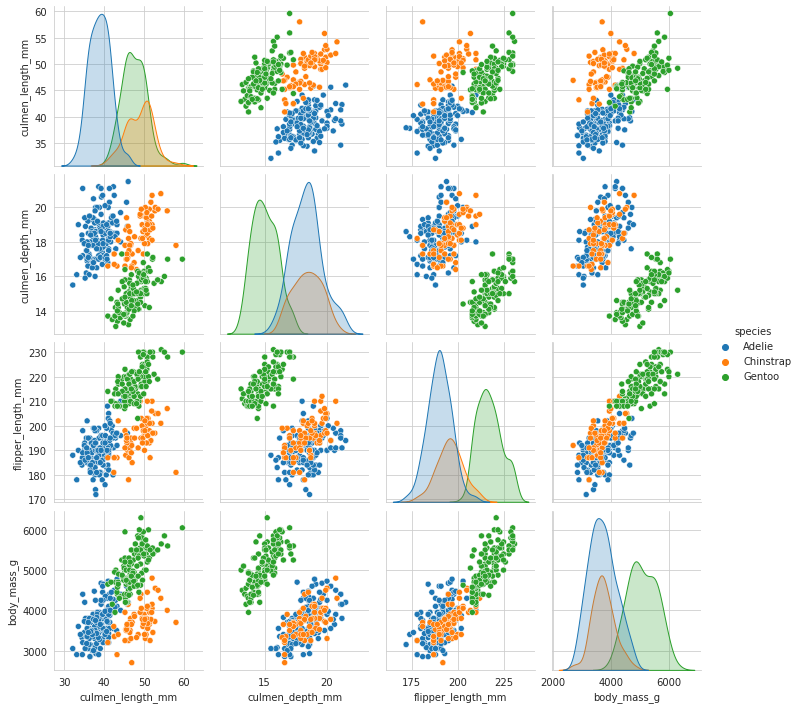

In [ ]:
sns.pairplot(data=df, hue="species")

In [ ]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## Data Preprocessing = Feature Engineering

Today we only look at encodings. At this step you could also 

*   create new feature,
*   discretizes (creaate bins),
*   scale (=normalize) numerical features, so all numerical columns lie roughly within the same ranges, 
*   create polynomial features etc.

In [ ]:
le = LabelEncoder()

In [123]:
df["sex"] = le.fit_transform(df["sex"])
df["island"] = le.fit_transform(df["island"])
df["species"] = le.fit_transform(df["species"])

In [124]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,2
...,...,...,...,...,...,...,...
338,2,0,47.2,13.7,214.0,4925.0,1
340,2,0,46.8,14.3,215.0,4850.0,1
341,2,0,50.4,15.7,222.0,5750.0,2
342,2,0,45.2,14.8,212.0,5200.0,1


## Train-Test-Split

The algorithms in Sklearn need as input the feature columns separately from the target column. The features are usually stored in a variable X (upper case), the target column in a variable y (lower case).

Additionally, to build good models that don't over- or underfit, we split the whole dataset into two parts: we randomly pick 20-30% of the rows: these are called the test set, the rest is called the training set.

So in the end, we have 4 parts: X_test, y_test, X_train and y_train.

In [ ]:
y = df["species"].values
X = df.loc[:, df.columns != "species"].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((250, 6), (84, 6), (250,), (84,))

## First model-training: Random Forest Classifier

In [ ]:
random_forest_model = RandomForestClassifier()

In [ ]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = random_forest_model.predict(X_test)

## Evaluating the results of the first model

In [ ]:
accuracy_score(y_test,y_pred)

0.9880952380952381

In [ ]:
confusion_matrix(y_test, y_pred)

array([[40,  0,  0],
       [ 1, 14,  0],
       [ 0,  0, 29]])

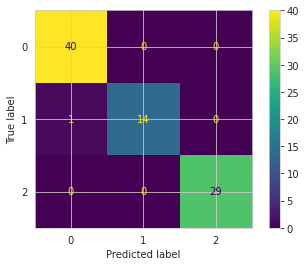

In [ ]:
plot_confusion_matrix(random_forest_model, X_test, y_test)

In [ ]:
precision = precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
precision, recall, f1

## Second model-training: k Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=14)

In [ ]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

In [ ]:
y_pred2 = knn_model.predict(X_test)

## Evaluating the results of the second model

In [ ]:
accuracy = accuracy_score(y_test,y_pred2)
precision = precision_score(y_test, y_pred2,average='micro')
recall =  recall_score(y_test, y_pred2,average='micro')
f1 = f1_score(y_test,y_pred2,average='micro')

accuracy, precision, recall, f1

(0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714,
 0.8214285714285714)